# Hyperparameter prediction using SVR

Using hyperparameter as input to predict `best_acc`.

Input are:
- `learning_rate`
- `hyper`
- `batch_size`
- `filters_1`
- `filters_2`
- `full_hidd_1`
- `full_hidd_2`
- `ksize_1`
- `ksize_2`
- `no_epochs`


Note: we have to remove `best_acc` and `best_loss` as those are not available during prediction time for training data

## Table of content
* [Importing libraries](#Importing-libraries-and-reading-from-csv-file)
* [Preparing datasets](#Preparing-datasets)
* [Feature scaling](#Feature-scaling) as of now is commented - is it required ? 
* [SVR Model training - poly](#Fitting-the-SVR-model)
* [Splitting into train and test](#Splitting-the-data-into-train-and-test)
* [PCA to visualize input](#Using-PCA-to-visualize-input-in-2D)

### Importing libraries and reading from csv file

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

sns.set(style="ticks")

In [20]:
dataset = pd.read_csv('hyperp.csv')
dataset.head()

,best_acc,learning_rate,hyper,batch_size,best_loss,filters_1,filters_2,full_hidd_1,full_hidd_2,ksize_1,ksize_2,no_epochs
0,0.6085,0.001,6,256,1.124841,64,96,125,125,5,5,18
1,0.6002,0.001,5,128,1.142996,32,64,100,125,3,5,20
2,0.5978,0.001,0,32,1.147990,32,96,100,80,3,4,19
3,0.5903,0.001,25,64,1.196584,64,96,100,125,3,3,23
4,0.5806,0.001,3,256,1.192041,32,48,60,125,3,3,24


### Preparing datasets

In [22]:
input_cols = [
    "learning_rate", "hyper",
    "batch_size", "filters_1",
    "filters_2", "full_hidd_1", 
    "full_hidd_2", "ksize_1", 
    "ksize_2", "no_epochs"
]

output_cols = ["best_acc"]

In [23]:
x = dataset[input_cols].values
y = dataset[output_cols].values

### Splitting the data into train and test

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

### Using PCA to visualize input in 2D

In [56]:
pca = PCA(n_components=2)
pcom = pca.fit_transform(x)
pca_df = pd.DataFrame(data=pcom, columns=["pca_1", "pca_2"])
finalpca_df = pd.concat([pca_df, dataset[output_cols]], axis = 1)

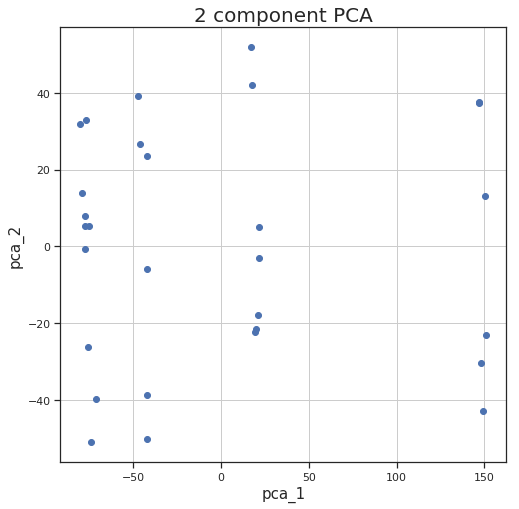

In [68]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel("pca_1", fontsize = 15)
ax.set_ylabel("pca_2", fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(finalpca_df["pca_1"], finalpca_df["pca_2"])
ax.grid()

### Feature scaling 

In [6]:
# from sklearn.preprocessing import StandardScaler
# standardscaler_x = StandardScaler()
# x = standardscaler_x.fit_transform(x)
# standardscaler_y = StandardScaler()
# y = standardscaler_y.fit_transform(y)

In [7]:
# reshape to 1d array, necessary for model.
# y = y.reshape(len(y),)

### Fitting the SVR model
- using train dataset to train SVR
- using test dataset to evaluate SVR performance

#### Using poly kernel

In [40]:
reg_poly_model = SVR(kernel='poly').fit(x_train,y_train)
reg_poly_model

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Training r-squared

In [70]:
y_train_predict = reg_poly_model.predict(x_train)
print(r2_score(y_train, y_train_predict))

0.8385214497528193


Testing r-squared

In [71]:
y_predict = reg_poly_model.predict(x_test)
print(r2_score(y_test, y_predict))

-0.8581209916548742


#### Using rbf kernel

In [73]:
reg_rbf_model = SVR(kernel='rbf').fit(x_train,y_train)
reg_rbf_model

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Training r-squared

In [74]:
y_train_predict = reg_rbf_model.predict(x_train)
print(r2_score(y_train, y_train_predict))

0.8017006425875294


Testing r-squared

In [75]:
y_predict = reg_rbf_model.predict(x_test)
print(r2_score(y_test, y_predict))

-0.4296487094700918


### Testing out using custom data point

In [9]:
# scaling test data for prediction
# test = np.zeros(1) # we are testing just one value
# test[0]= 6.5
# test = test.reshape(1,1) # reshape to 2D array!
# test = standardscaler_x.transform(test) # rescaling test data like train data

In [11]:
# inverse scaling y to real value
y_predict = standardscaler_y.inverse_transform(y_pred)